In [14]:
from sleep_analysis.datasets.d04_main_dataset_control import D04MainStudy
import numpy as np
import pandas as pd

In [15]:
from empkins_io.sync import SyncedDataset

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
from biopsykit.signals.ecg import EcgProcessor

In [17]:
from empkins_micro.emrad.radar import get_rpeaks, get_peak_probabilities

In [18]:
from fau_colors import cmaps, register_fausans_font

In [19]:
%matplotlib widget

In [65]:
register_fausans_font()
plt.close("all")

palette = sns.color_palette(cmaps.faculties)
sns.set_theme(context="talk", style="ticks", font="sans-serif", palette=palette)

plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["mathtext.default"] = "regular"

palette

[(0.0, 0.1843137254901961, 0.4235294117647059),
 (0.4666666666666667, 0.6235294117647059, 0.7098039215686275),
 (1.0, 0.7215686274509804, 0.10980392156862745),
 (0.0, 0.6392156862745098, 0.8784313725490196),
 (0.2627450980392157, 0.6901960784313725, 0.16470588235294117),
 (0.7843137254901961, 0.06274509803921569, 0.1803921568627451)]

In [21]:
### General Settings

# Participant ID
id = 4

# General Radar Settings
fs_radar = 1953.125
window_size = 300

In [24]:
dataset = D04MainStudy()

In [25]:
dataset

,subj_id
0,02
1,03
2,04
3,05
4,06
5,07
6,10
7,11
8,12
9,14


In [26]:
radar_data = dataset[id].radar_data.data_as_df(index="local_datetime", add_sync_in=True, add_sync_out=True)

In [27]:
synced_radar = dataset[id].sync_radar(radar_data)

Prepare SyncedDataset
Sync beginning of m-sequence


/Users/danielkrauss/code/Empkins/empkins-io/empkins_io/sync/_sync.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_secondary.loc[:, sync_channel_secondary] = self._binarize_signal(


-4


/Users/danielkrauss/code/Empkins/empkins-io/empkins_io/sync/_sync.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_secondary.loc[:, sync_channel_secondary] = self._binarize_signal(


25


/Users/danielkrauss/code/Empkins/empkins-io/empkins_io/sync/_sync.py:325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_secondary.loc[:, sync_channel_secondary] = self._binarize_signal(


40
Find shift at the end of the m-sequence
Shift: rad2_aligned_ 358
Shift: rad3_aligned_ 157
Shift: rad4_aligned_ 29
Resample sample-wise to get equal length
48512703
48513061
48512860
48512732


In [28]:
#plt.close("all")
#
#num = int(0)
#fig, ax = plt.subplots(5, sharex=True)
#synced_radar["radar_1_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
#synced_radar["radar_2_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
#synced_radar["radar_3_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
#synced_radar["radar_4_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])
#plt.show()
#
#num = int(20e6)
#fig, ax = plt.subplots(5, sharex=True)
#synced_radar["radar_1_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
#synced_radar["radar_2_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
#synced_radar["radar_3_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
#synced_radar["radar_4_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])
#plt.show()
#
#
#
#num = int(40e6)
#fig, ax = plt.subplots(5, sharex=True)
#synced_radar["radar_1_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[0])
#synced_radar["radar_2_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[1])
#synced_radar["radar_3_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[2])
#synced_radar["radar_4_resampled_"].iloc[num:num+4000]["Sync_Out"].plot(ax=ax[3])
#plt.show()

In [46]:
start = "2023-04-26 00:10:00"
end = "2023-04-26 00:20:00"

In [48]:
synced_radar_slice = synced_radar.loc[start:end]
synced_radar_slice

rad1_aligned_resampled_                   \
channel                                                I        Q Sync_In   
date (Europe/Berlin)                                                        
2023-04-26 00:10:00.000256+02:00                -4036896 -2202906       0   
2023-04-26 00:10:00.000768+02:00                -4036816 -2203041       0   
2023-04-26 00:10:00.001280+02:00                -4036688 -2202945       0   
2023-04-26 00:10:00.001792+02:00                -4036759 -2203661       0   
2023-04-26 00:10:00.002304+02:00                -4037001 -2203270       0   
...                                                  ...      ...     ...   
2023-04-26 00:20:00.997632+02:00                -3842833 -1962683       1   
2023-04-26 00:20:00.998144+02:00                -3842562 -1962326       0   
2023-04-26 00:20:00.998656+02:00                -3842605 -1962351       0   
2023-04-26 00:20:00.999168+02:00                -3842605 -1962690       0   
2023-04-26 00:20:00.999680+02:00                -3842660 -1962387       0   

                                          rad2_aligned_resampled_  \
channel                          Sync_Out                       I   
date (Europe/Berlin)                                                
2023-04-26 00:10:00.000256+02:00      1.0            3.806330e+06   
2023-04-26 00:10:00.000768+02:00      1.0            3.806910e+06   
2023-04-26 00:10:00.001280+02:00      1.0            3.806961e+06   
2023-04-26 00:10:00.001792+02:00      1.0            3.806366e+06   
2023-04-26 00:10:00.002304+02:00      1.0            3.806505e+06   
...                                   ...                     ...   
2023-04-26 00:20:00.997632+02:00      1.0            3.749055e+06   
2023-04-26 00:20:00.998144+02:00      1.0            3.748764e+06   
2023-04-26 00:20:00.998656+02:00      1.0            3.749704e+06   
2023-04-26 00:20:00.999168+02:00      1.0            3.749350e+06   
2023-04-26 00:20:00.999680+02:00      1.0            3.749311e+06   

                                                                     \
channel                                       Q   Sync_In  Sync_Out   
date (Europe/Berlin)                                                  
2023-04-26 00:10:00.000256+02:00  537739.520002 -0.070345  0.996466   
2023-04-26 00:10:00.000768+02:00  538650.087583  0.926672  1.003306   
2023-04-26 00:10:00.001280+02:00  538740.808562  1.027200  0.996894   
2023-04-26 00:10:00.001792+02:00  538391.269399  0.984798  1.002928   
2023-04-26 00:10:00.002304+02:00  538606.304256  1.010122  0.997230   
...                                         ...       ...       ...   
2023-04-26 00:20:00.997632+02:00  527241.238281 -0.132556  0.989269   
2023-04-26 00:20:00.998144+02:00  526767.261847  0.075465  1.009718   
2023-04-26 00:20:00.998656+02:00  526434.247353 -0.057473  0.991122   
2023-04-26 00:20:00.999168+02:00  526529.214969  0.051106  1.008170   
2023-04-26 00:20:00.999680+02:00  526112.437542 -0.051555  0.992435   

                                 rad3_aligned_resampled_                \
channel                                                I             Q   
date (Europe/Berlin)                                                     
2023-04-26 00:10:00.000256+02:00           -5.288911e+06 -2.097814e+06   
2023-04-26 00:10:00.000768+02:00           -5.290198e+06 -2.097631e+06   
2023-04-26 00:10:00.001280+02:00           -5.291128e+06 -2.100740e+06   
2023-04-26 00:10:00.001792+02:00           -5.290642e+06 -2.102137e+06   
2023-04-26 00:10:00.002304+02:00           -5.289844e+06 -2.102616e+06   
...                                                  ...           ...   
2023-04-26 00:20:00.997632+02:00           -5.350818e+06 -2.079774e+06   
2023-04-26 00:20:00.998144+02:00           -5.351405e+06 -2.079416e+06   
2023-04-26 00:20:00.998656+02:00           -5.351512e+06 -2.079487e+06   
2023-04-26 00:20:00.999168+02:00           -5.351398e+06 -2.080012e+06   
2023-04-26 00:20:00.999680+02:

In [49]:
for subj in dataset[0]:
    print("-------------------------------------------------")
    print("Processing participant " + subj.index["subj_id"][0])
    print("-------------------------------------------------")

    
    print("Radar 1")
    lstm_output_1 = get_peak_probabilities(synced_radar_slice["rad1_aligned_resampled_"][["I", "Q"]], fs_radar=fs_radar, window_size=window_size)
    print("Radar 2")
    lstm_output_2 = get_peak_probabilities(synced_radar_slice["rad2_aligned_resampled_"][["I", "Q"]], fs_radar=fs_radar, window_size=window_size)
    print("Radar 3")
    lstm_output_3 = get_peak_probabilities(synced_radar_slice["rad3_aligned_resampled_"][["I", "Q"]], fs_radar=fs_radar, window_size=window_size)
    print("Radar 4")
    lstm_output_4 = get_peak_probabilities(synced_radar_slice["rad4_aligned_resampled_"][["I", "Q"]], fs_radar=fs_radar, window_size=window_size)

-------------------------------------------------
Processing participant 02
-------------------------------------------------
Radar 1
------ duration ------
duration of mesurment in sec: 600.999424
duration of mesurment in min: 10.016657066666665
------ num_windows before and after factoring overlap------
num win: 2
num win: 4


  0%|                                                                                                                                                                                 | 0/3 [00:00<?, ?it/s]

46/46 [==============================] - 4s 86ms/step


 33%|████████████████████████████████████████████████████████▎                                                                                                                | 1/3 [00:04<00:09,  4.86s/it]

46/46 [==============================] - 4s 91ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 2/3 [00:09<00:04,  4.72s/it]

46/46 [==============================] - 4s 87ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:13<00:00,  4.62s/it]

Radar 2
------ duration ------
duration of mesurment in sec: 600.999424
duration of mesurment in min: 10.016657066666665
------ num_windows before and after factoring overlap------
num win: 2
num win: 4



  0%|                                                                                                                                                                                 | 0/3 [00:00<?, ?it/s]

46/46 [==============================] - 7s 147ms/step


 33%|████████████████████████████████████████████████████████▎                                                                                                                | 1/3 [00:07<00:15,  7.62s/it]

46/46 [==============================] - 4s 95ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 2/3 [00:12<00:05,  5.94s/it]

46/46 [==============================] - 5s 100ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:17<00:00,  5.79s/it]

Radar 3
------ duration ------
duration of mesurment in sec: 600.999424
duration of mesurment in min: 10.016657066666665
------ num_windows before and after factoring overlap------
num win: 2
num win: 4



  0%|                                                                                                                                                                                 | 0/3 [00:00<?, ?it/s]

46/46 [==============================] - 6s 119ms/step


 33%|████████████████████████████████████████████████████████▎                                                                                                                | 1/3 [00:06<00:12,  6.29s/it]

46/46 [==============================] - 5s 103ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 2/3 [00:11<00:05,  5.61s/it]

46/46 [==============================] - 5s 102ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.51s/it]

Radar 4
------ duration ------
duration of mesurment in sec: 600.999424
duration of mesurment in min: 10.016657066666665
------ num_windows before and after factoring overlap------
num win: 2
num win: 4



  0%|                                                                                                                                                                                 | 0/3 [00:00<?, ?it/s]

46/46 [==============================] - 6s 114ms/step


 33%|████████████████████████████████████████████████████████▎                                                                                                                | 1/3 [00:06<00:12,  6.14s/it]

46/46 [==============================] - 5s 98ms/step


 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                        | 2/3 [00:11<00:05,  5.39s/it]

46/46 [==============================] - 5s 101ms/step


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:16<00:00,  5.34s/it]


In [50]:
# Concatenate the DataFrames along the columns
combined = pd.concat([lstm_output_1, lstm_output_2, lstm_output_3, lstm_output_4], axis=1)

lstm_output_sum = combined.sum(axis=1)

# Get the maximum value for each row
max_values = combined.max(axis=1)

# If you want to keep the DataFrame format, you can reshape the result
lstm_output_max = pd.DataFrame(max_values, columns=['LSTM_MAX'])

In [51]:
lstm_output_max_smooth = lstm_output_max.rolling(100, center = True).mean()
lstm_output_max_smooth

,LSTM_MAX
date (Europe/Berlin),
2023-04-26 00:10:00.000256+02:00,NaN
2023-04-26 00:10:00.000768+02:00,NaN
2023-04-26 00:10:00.001280+02:00,NaN
2023-04-26 00:10:00.001792+02:00,NaN
2023-04-26 00:10:00.002304+02:00,NaN
...,...
2023-04-26 00:18:44.997888+02:00,NaN
2023-04-26 00:18:44.998400+02:00,NaN
2023-04-26 00:18:44.998912+02:00,NaN


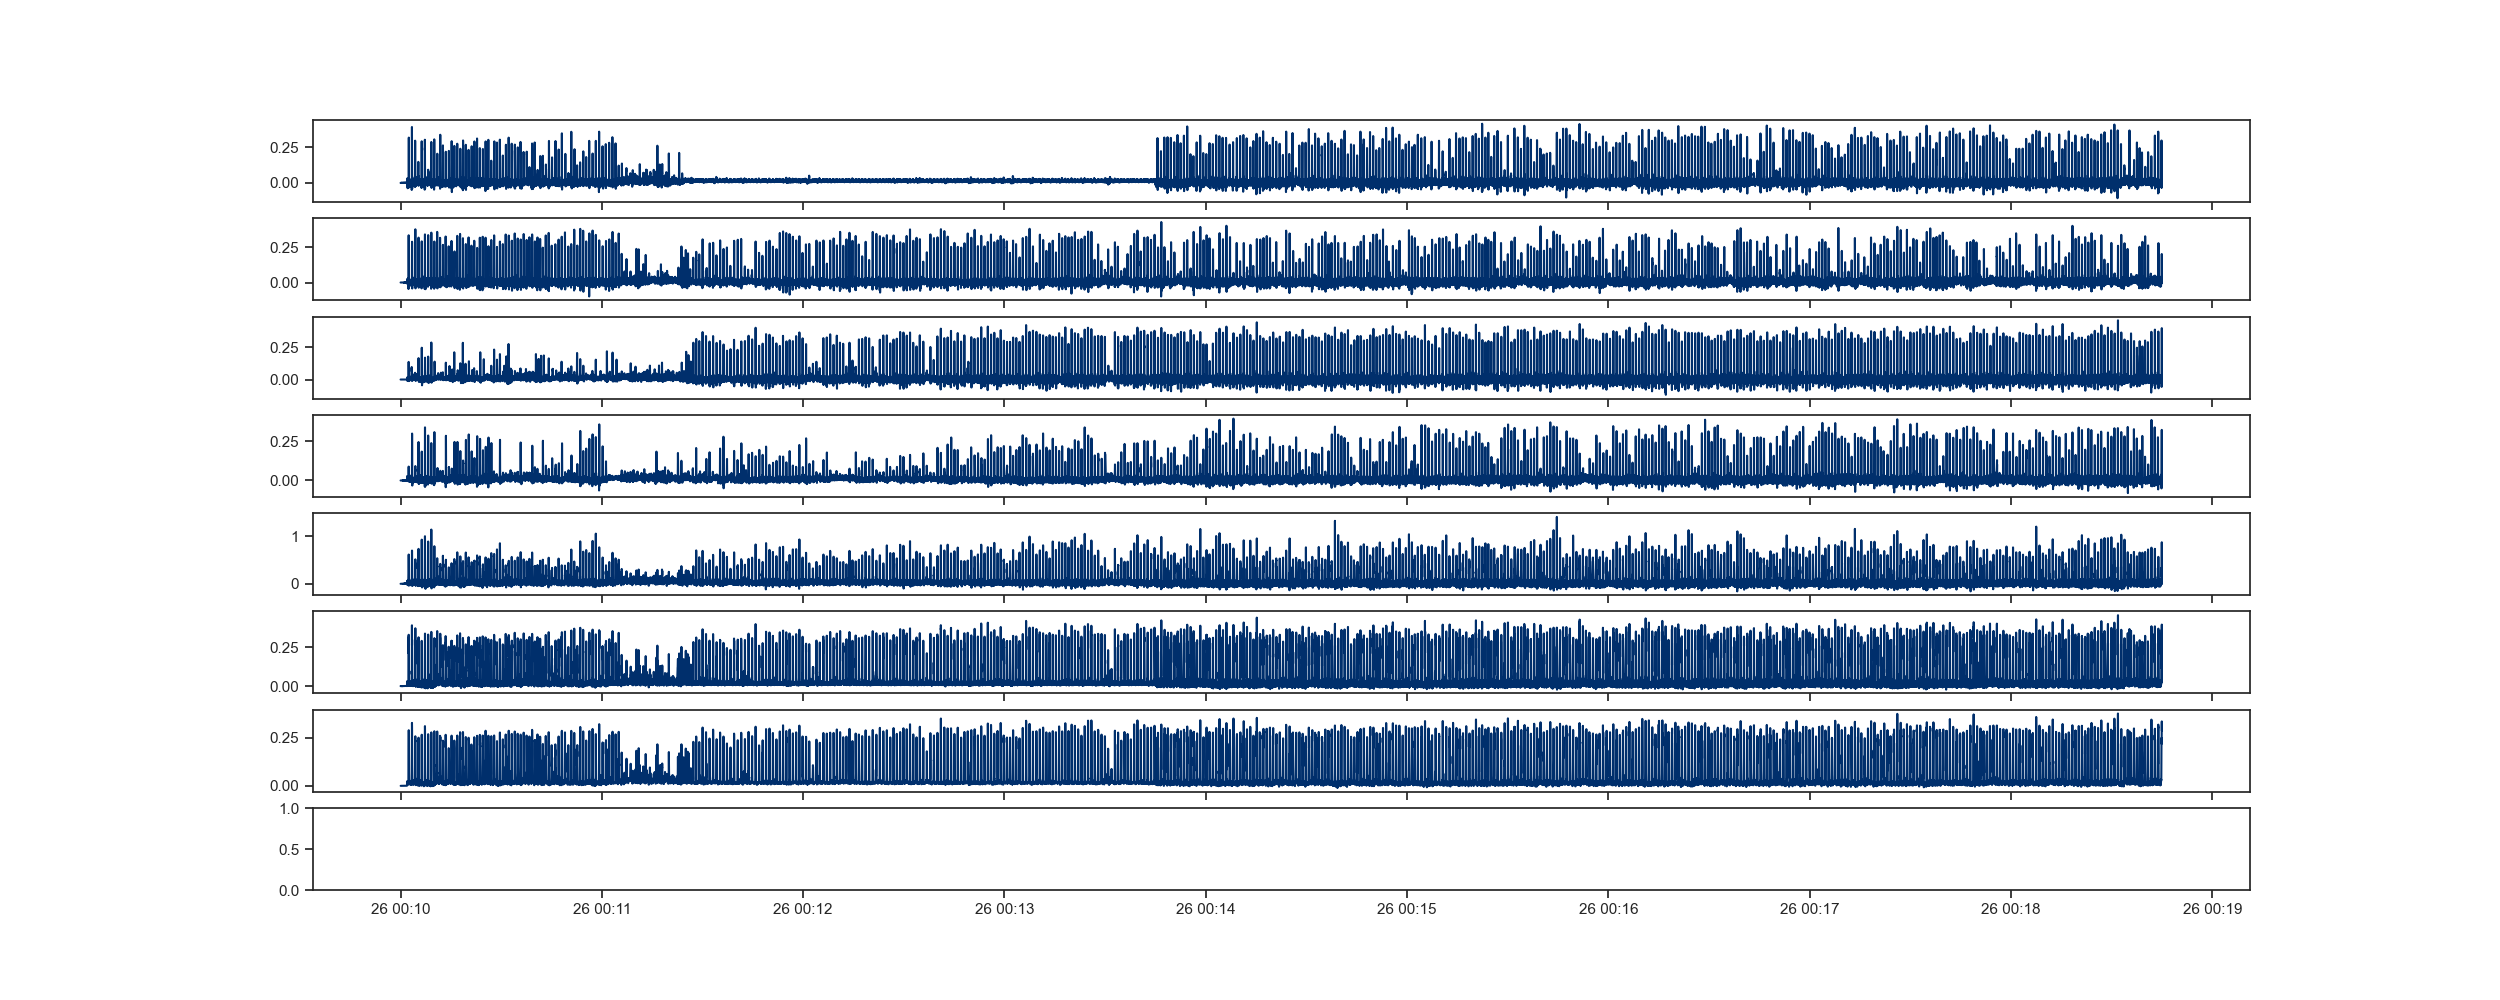

In [52]:
fig, axs = plt.subplots(8, figsize=(25,10), sharex=True)
axs[0].plot(lstm_output_1)
axs[1].plot(lstm_output_2)
axs[2].plot(lstm_output_3)
axs[3].plot(lstm_output_4)
axs[4].plot(lstm_output_sum)
axs[5].plot(lstm_output_max)
axs[6].plot(lstm_output_max_smooth)

plt.show()

In [53]:
probability_dict = {"lstm_output_1" : lstm_output_1, "lstm_output_2" : lstm_output_2, "lstm_output_3" : lstm_output_3, "lstm_output_4" : lstm_output_4}

r_peaks, lstm_probability = get_rpeaks(probability_dict, fs_radar=fs_radar)

In [54]:
r_peaks

,R_Peak_Idx,R_Peak_Quality,R_Peak_Outlier,RR_Interval
date (Europe/Berlin),,,,
2023-04-26 00:10:02.435328+02:00,4756.0,1.0,0.0,0.965120
2023-04-26 00:10:03.400448+02:00,6641.0,1.0,0.0,0.996352
2023-04-26 00:10:04.396800+02:00,8587.0,1.0,0.0,0.958464
2023-04-26 00:10:05.355264+02:00,10459.0,1.0,0.0,0.954368
2023-04-26 00:10:06.309632+02:00,12323.0,1.0,0.0,0.957952
...,...,...,...,...
2023-04-26 00:18:40.845568+02:00,1017274.0,1.0,0.0,1.022464
2023-04-26 00:18:41.868032+02:00,1019271.0,1.0,0.0,1.032192
2023-04-26 00:18:42.900224+02:00,1021287.0,1.0,0.0,1.014272


In [55]:
ecg_data = dataset[id].ecg_data.data_as_df(index="local_datetime")[["ECG II"]]
ecg_data_slice = ecg_data.loc[start:end]

Extracting EDF parameters from /Users/danielkrauss/code/Empkins/Data/empkins_contactless_sleep_lab/Vp_06/psg/Vp_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


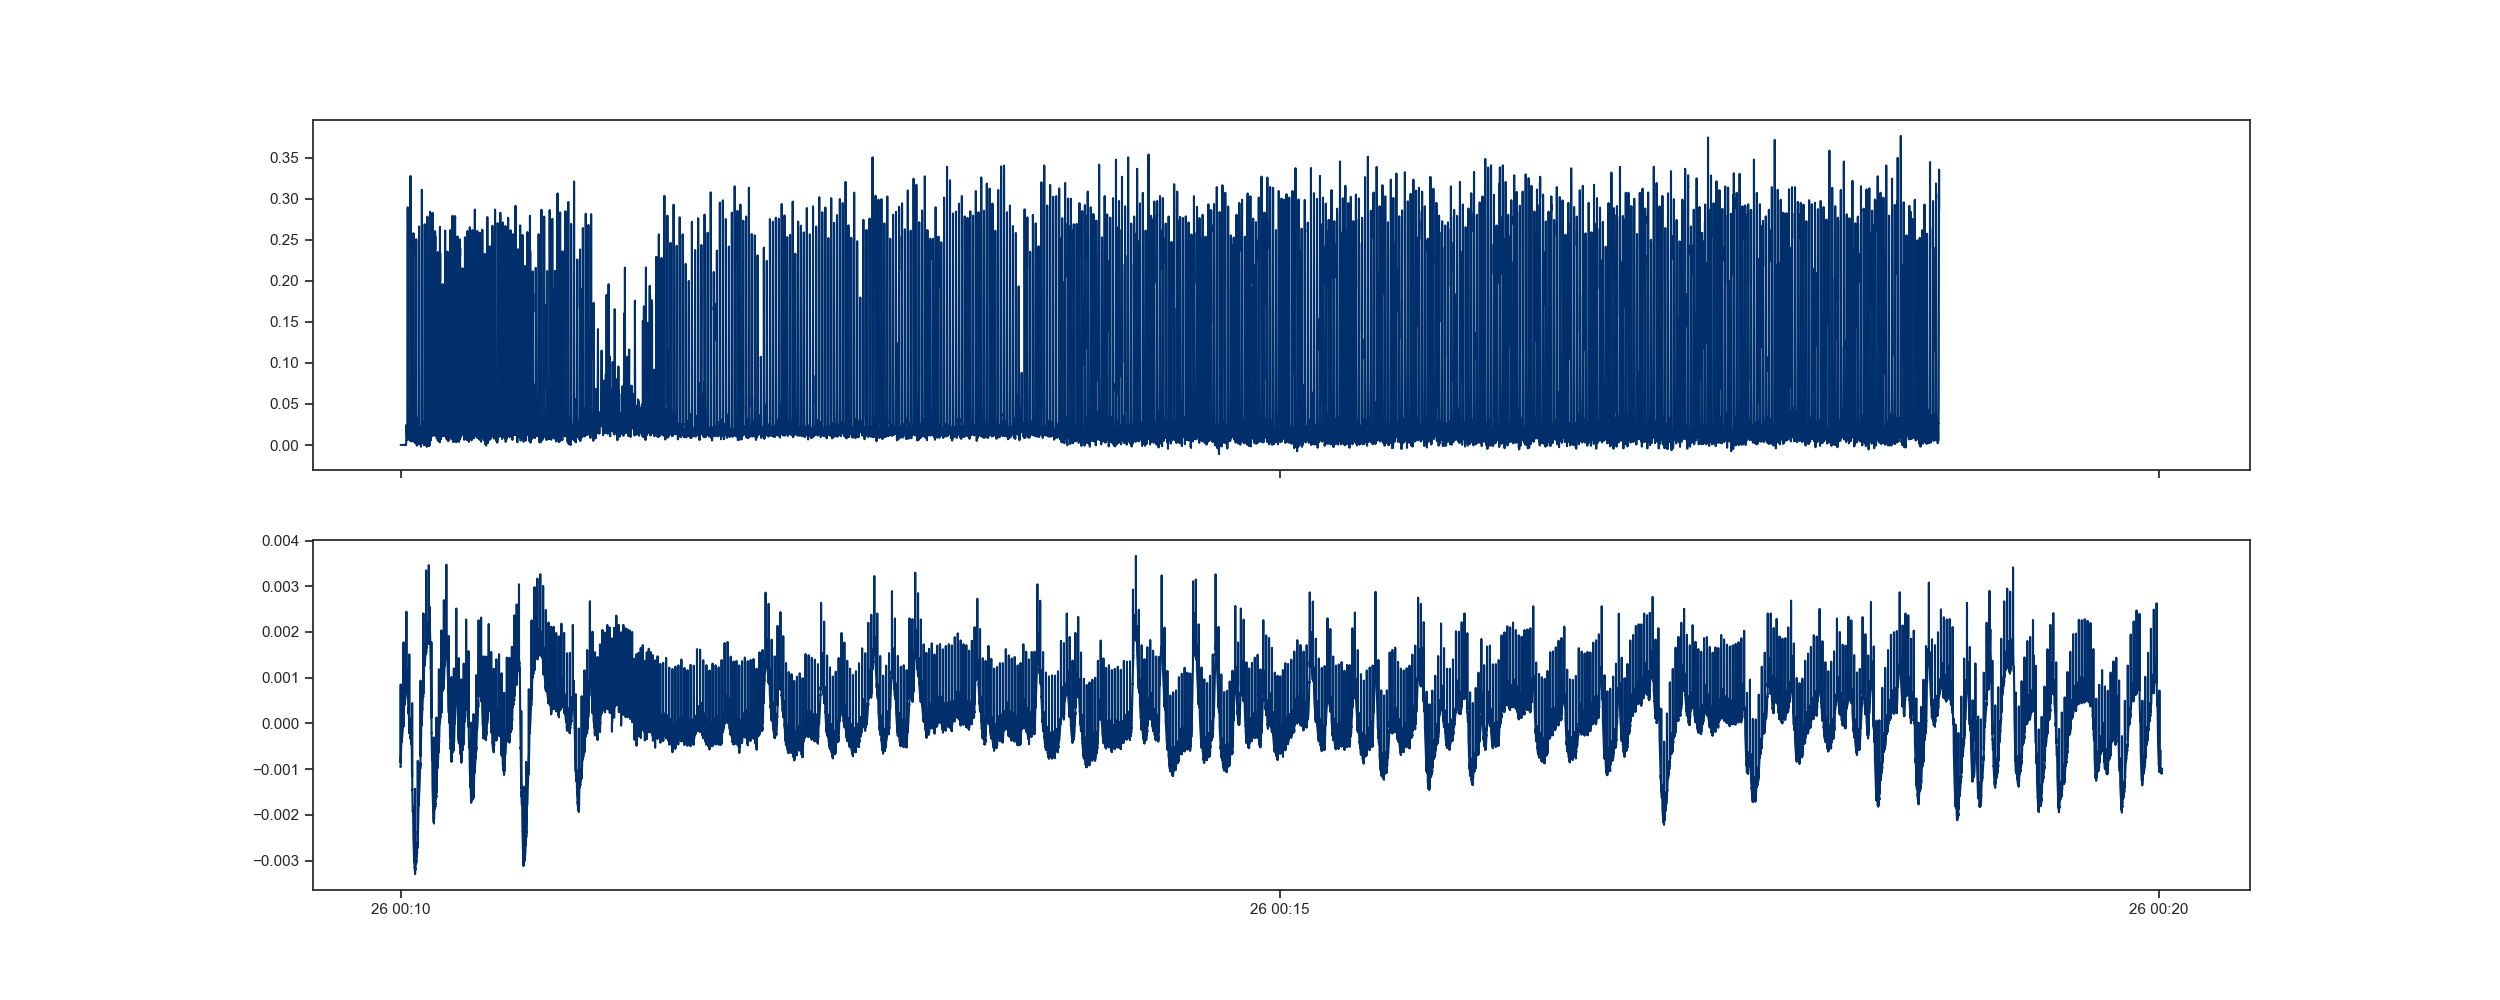

In [56]:
fig, axs = plt.subplots(2, figsize=(25,10), sharex=True)
axs[0].plot(lstm_probability)
axs[1].plot(ecg_data_slice)

In [60]:
start = "2023-04-26 00:11:00"
end = "2023-04-26 00:14:00"

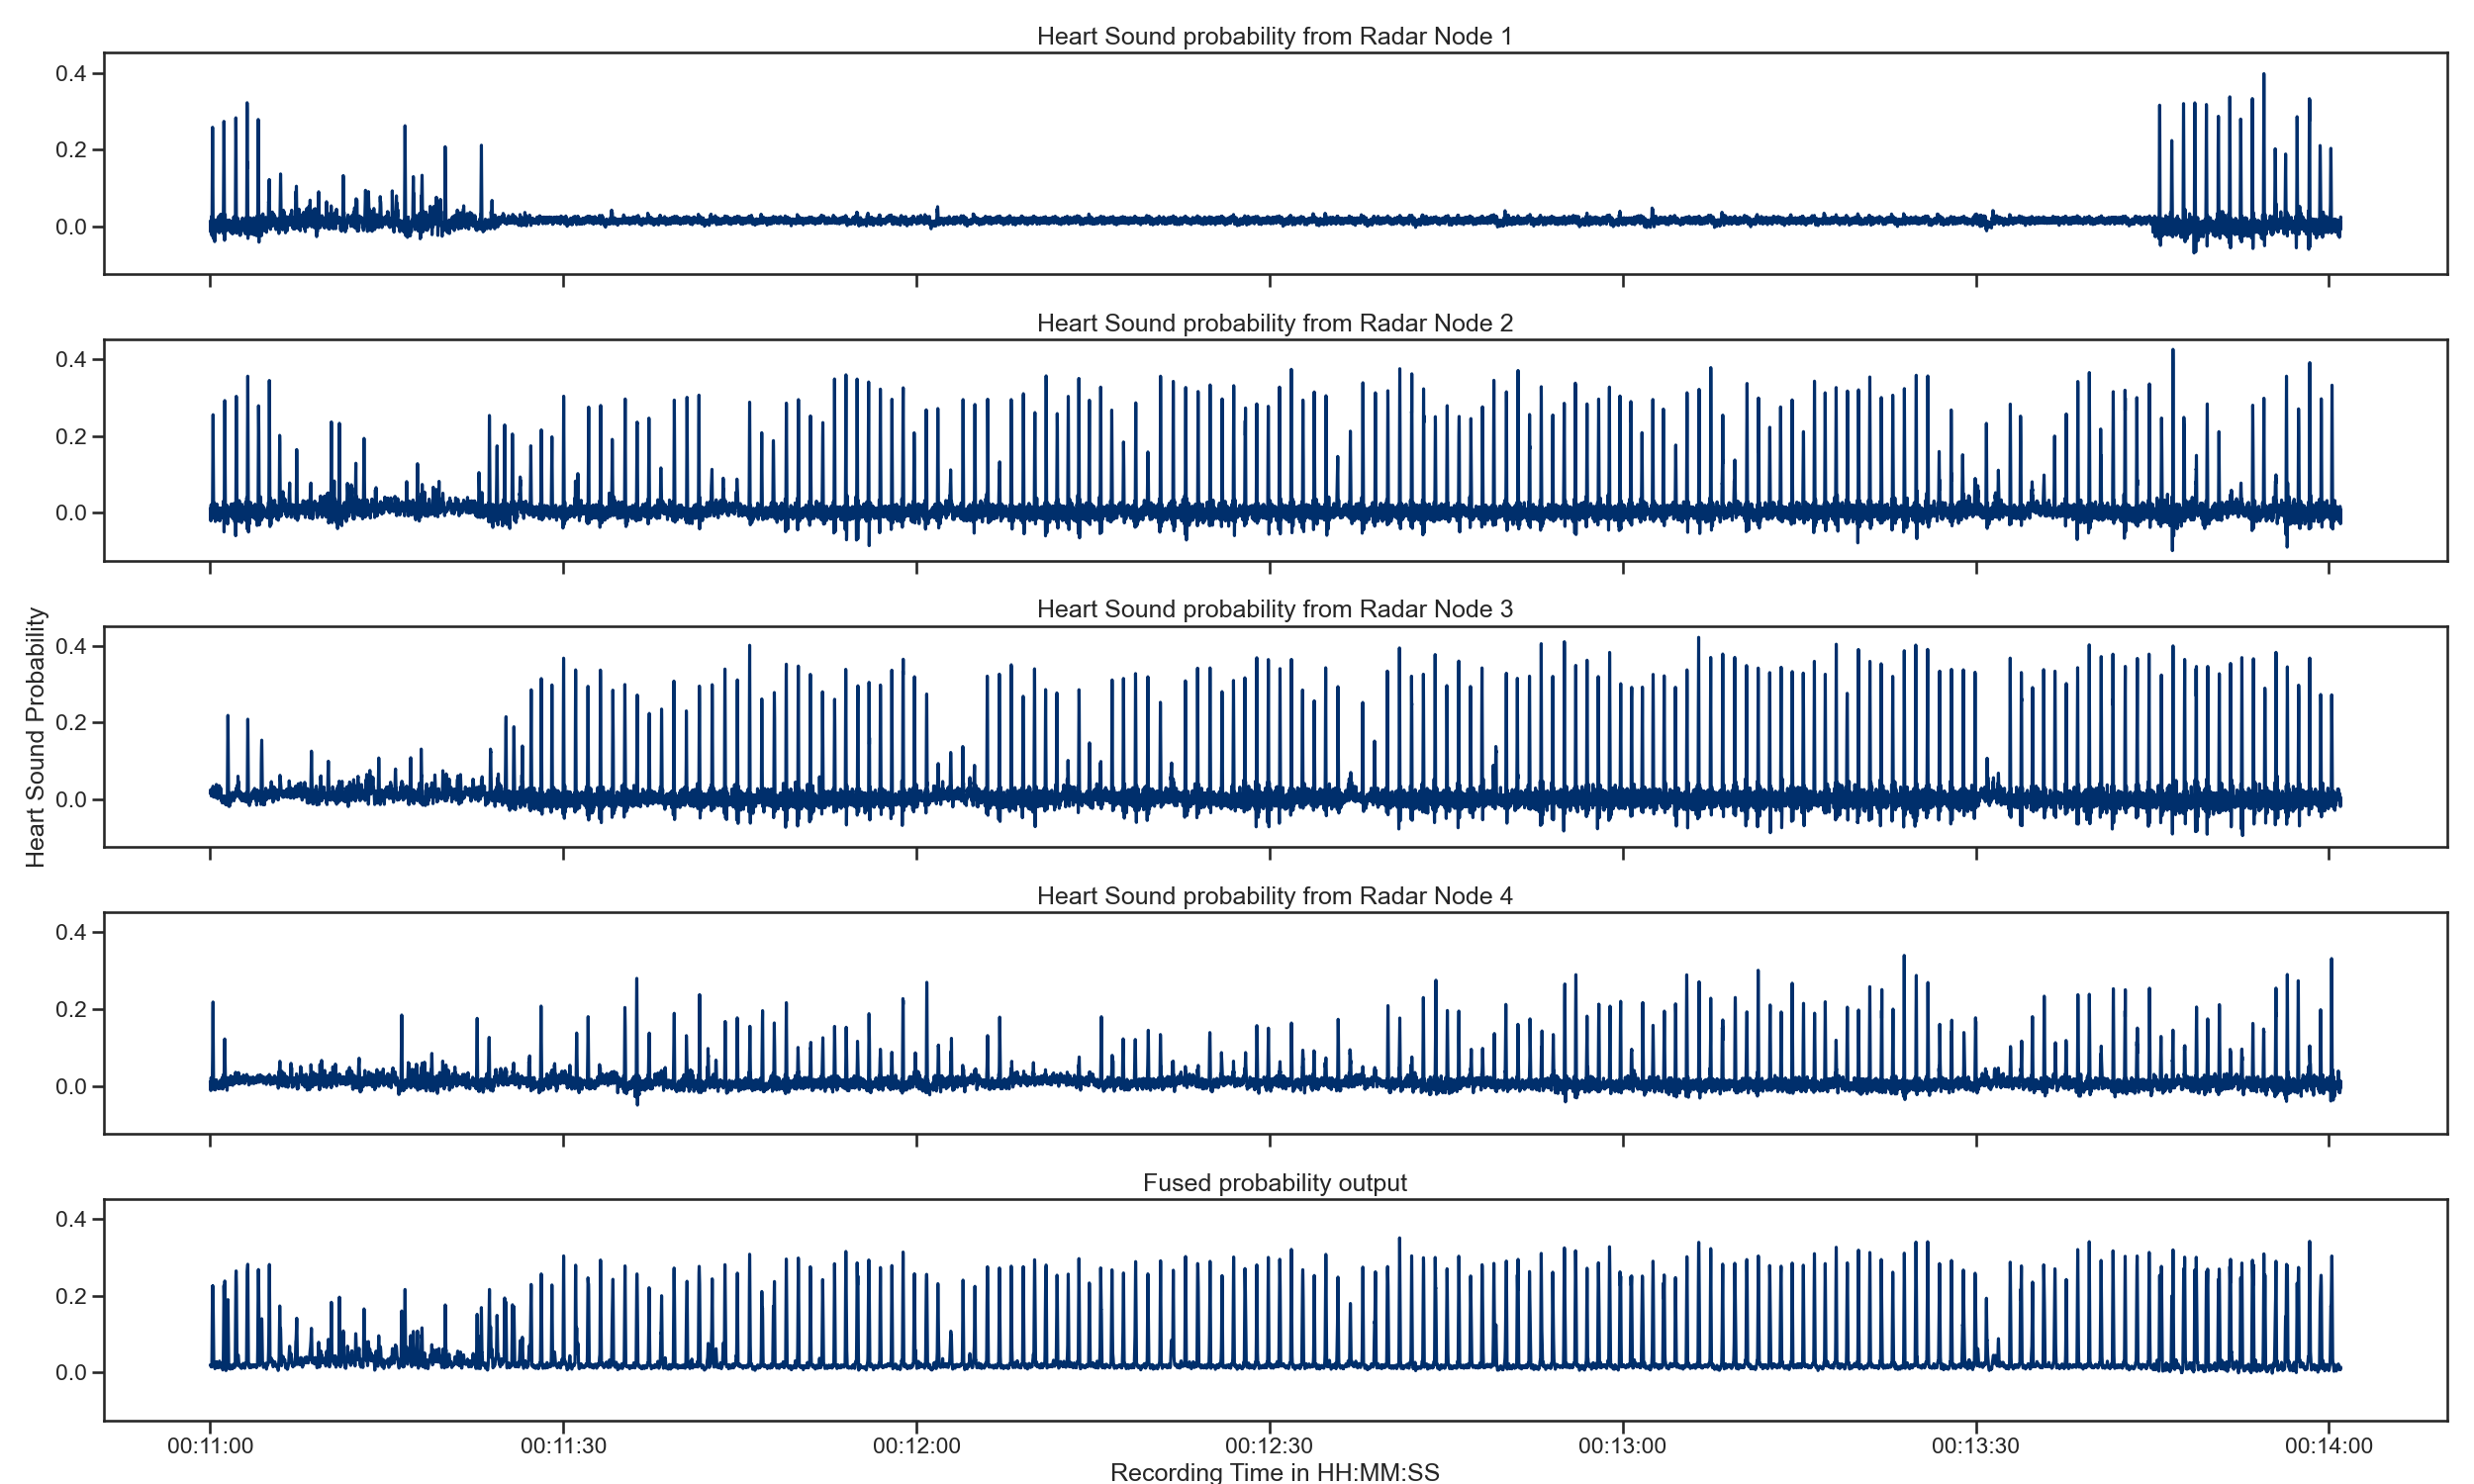

In [73]:
fig, axs = plt.subplots(5, figsize=(25,15), sharex=True, sharey = True)
axs[0].set_title("Heart Sound probability from Radar Node 1")
axs[0].plot(lstm_output_1.loc[start:end])
#axs[0].set_ylabel("Probability")

axs[1].set_title("Heart Sound probability from Radar Node 2")
axs[1].plot(lstm_output_2.loc[start:end])
#axs[1].set_ylabel("Probability")

axs[2].set_title("Heart Sound probability from Radar Node 3")
axs[2].plot(lstm_output_3.loc[start:end])
axs[2].set_ylabel("Heart Sound Probability")

axs[3].set_title("Heart Sound probability from Radar Node 4")
axs[3].plot(lstm_output_4.loc[start:end])
#axs[3].set_ylabel("Probability")

axs[4].set_title("Fused probability output")
#axs[4].set_ylabel("Probability")
axs[4].plot(lstm_output_max_smooth.loc[start:end])


plt.tight_layout()
plt.xlabel("Recording Time in HH:MM:SS")
plt.show()
plt.savefig("HR_proba_fusing.pdf", bbox_inches="tight")